<a href="https://colab.research.google.com/github/PrusTalbot/PrusTalbot/blob/main/%D0%9A%D0%B5%D0%B9%D1%81%20%D1%81%D0%BA%D0%B2%D0%BE%D0%B7%D0%BD%D0%BE%D0%B9%20%E2%84%963.%20%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.%20%D0%A1%D0%B8%D0%B3%D0%BC%D0%BE%D0%B8%D0%B4%D0%B0.%20%D0%9F%D0%BE%D0%B4%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0.%20%D0%A1%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**СКВОЗНОЙ КЕЙС №3**

**Спрогнозировать вероятность досрочного отзыва депозитов клиентами**





Данные:

1. age - возраст;
2. job - род деятельности / занятость;
3. marital status - семейное положение;
4. education - уровень образования;
5. balance - баланс депозитного счета;
6. default - наличие просрочек по кредитам в прошлом;
7. housing - наличие дома;
8. loan - наличие ипотеки;
9. contact - предпочтительный способ связи;
10. day / month - день и месяц заключение договора на открытие депозитного счета;
11. duration - длительность договора (на какой срок открыт депозит);
12. campaign - идентификатор рекламной кампании, по которой был привлечен клиент;
13. pdays - технический столбец;
14. previous - был ли у клиента до этого депозит;
15. y - наша целевая переменная, по которой можно понять, заберет клиент депозит или нет.

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded=files.upload()

Saving CL-Python-2-Extra-Data.csv to CL-Python-2-Extra-Data.csv


In [86]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['CL-Python-2-Extra-Data.csv']))
display(df.head(2))

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no


**ЗАМЕНЯЕМ ПРОПУСКИ В age НА СРЕДНЮЮ А В balance НА 0**

In [87]:
df.info() #Смотрим в каких столбцах пропуски - меньше строк в столбце чем, в Датафрейме
# Это age и balance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [88]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['balance'].fillna(0,inplace=True)

In [89]:
print(df.min(), df.max()) # Смотрим минимальные и максимальные значения ЧТОБ НАЙТИ ВЫБРОСЫ


Id               1001
age              -1.0
job            admin.
marital      divorced
education     primary
default            no
balance       -8019.0
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            0
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
dtype: object Id              46211
age             999.0
job           unknown
marital        single
education     unknown
default           yes
balance      102127.0
housing           yes
loan              yes
contact       unknown
day                31
month             sep
duration         4918
campaign           63
pdays             871
previous          275
poutcome      unknown
y                 yes
dtype: object


In [90]:
df[df.age<15] # Отфильтровать возраст по условию (МЛАДШЕ 15 ЛЕТ НЕ ДАДУТ КРЕДИТ)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,46204,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,46205,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,46206,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [91]:
df[df.age>105] # Отфильтровать возраст по условию (СТАРШЕ 105ЛЕТ НЕ БЕРЕМ)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [92]:
index_of_age_anomaly=df[df.age<15].index    # Находим индекс строк, где возраст менее 15 лет
df.drop(index_of_age_anomaly, inplace=True) # Удаляем эти строки по их индексу
index_of_age_anomaly=df[df.age>105].index
df.drop(index_of_age_anomaly, inplace=True)

df.shape # Смотрим количество строк

(45207, 18)

In [93]:
df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45207, dtype: bool

In [94]:
df[df.duplicated()] # Показать строки в которых есть дубликаты

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [95]:
df.drop_duplicates(inplace=True)   # Удалили дуБликаты
df[df.duplicated(subset=['age'])]  # Посмотрели наличие дубликатов в столбце age

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,1014,58.0,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no
17,1018,57.0,blue-collar,married,primary,no,52.0,yes,no,unknown,5,may,38,1,-1,0,unknown,no
19,1020,33.0,services,married,secondary,no,0.0,yes,no,unknown,5,may,54,1,-1,0,unknown,no
20,1021,28.0,blue-collar,married,secondary,no,723.0,yes,yes,unknown,5,may,262,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**НОРМАЛИЗАЦИЯ**

In [96]:
from sklearn.preprocessing import MinMaxScaler # Импортируем библиотеку
min_max_scaler=MinMaxScaler()               # Инициализируем экземпляр класса
x=df['balance'].values.reshape(-1,1)        # Приводим к двумерному массиву
min_max_scaler.fit(x)                       # Определяем мин и макс параметры с помощью метода fit в переменную min_max_scaler
x_minmax_scaled=min_max_scaler.transform(x) # Нормализуем данные и создаем новую переменную x_minmax_scaled
df['balance_minmax']=x_minmax_scaled        # Создали столбец и внесли туда значения из x_minmax_scaled


**СТАНДАРТИЗАЦИЯ**

In [97]:
from sklearn.preprocessing import StandardScaler # Импортируем библиотеку
stand_scaler=StandardScaler()               # Инициализируем экземпляр класса
x=df['balance'].values.reshape(-1,1)          # Приводим к двумерному массиву
stand_scaler.fit(x)
x_standart_scaled=stand_scaler.transform(x)   # Стандартизируем данные и создаем новую переменную x_standart_scaled
df['balance_standart']=x_standart_scaled      # Создали столбец и внесли туда значения из x_standart_scaled

In [98]:
display(df.head(5))

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_minmax,balance_standart
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073067,-0.437871
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072822,-0.446738
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086476,0.047210
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072812,-0.447067
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0.074901,-0.371529


**СЧИТАЕМ СКОЛЬКО И КАКИЕ ЗНАЧЕНИЯ СОДЕРЖАТ СТОЛБЦЫ**

In [99]:
df['y'].value_counts() # СЧИТАЕМ СКОЛЬКО КАКИХ ЗНАЧЕНИЙ СОДЕРЖИТ СТОЛБЕЦ 'y'

no     39921
yes     5286
Name: y, dtype: int64

In [100]:
df['job'].value_counts()  # --//--    'job'

blue-collar      9732
management       9457
technician       7596
admin.           5171
services         4154
retired          2263
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [101]:
df['marital'].value_counts()   # --//--    'marital'

married     27212
single      12788
divorced     5207
Name: marital, dtype: int64

In [102]:
df['education'].value_counts()

secondary    23200
tertiary     13299
primary       6851
unknown       1857
Name: education, dtype: int64

In [103]:
df['default'].value_counts()

no     44392
yes      815
Name: default, dtype: int64

**ЗАМЕНЯЕМ КАТЕГОРИАЛЬНЫЕ ЗНАЧЕНИЯ НА ЧИСЛОВЫЕ**

In [104]:
y_to_replace = {"no": 0, "yes": 1}       # УСЛОВИЕ
df["y"] = df["y"].replace(y_to_replace)  # ЗАМЕНА

job_cat = pd.get_dummies(df.job)         # РАЗНЕСЕМ 12 ЗНАЧЕНИЙ job ПО СТОЛБЦАМ И ЗАПИШЕМ В job_cat
df = pd.concat([df, job_cat], axis = 1)  # ЗАНЕСЕМ job_cat В НАШ ДАТАФРЕЙМ
df.drop("job", inplace = True, axis = 1) # УДАЛИМ ИСХОДНЫЙ СТОЛБЕЦ

marital_cat = pd.get_dummies(df.marital) # АНАЛОГИЧНО КАК И С job
df = pd.concat([df, marital_cat], axis = 1)
df.drop("marital", inplace = True, axis = 1)
# С ОБРАЗОВАНИЕМ ПРИМЕНИМ УСЛОВНЫЙ КОЭФФИЦИЕНТ, Т.К. УРОВЕНЬ ОБРАЗОВАНИЯ ТРУДНО ОЦЕНИТЬ ЛИНЕЙНО
education_to_replace = {"unknown": 0, "primary": 1, "secondary": 4, "tertiary": 8}
df["education"] = df["education"].replace(education_to_replace)

default_to_replace = {"no": 0, "yes": 1}                    # АНАЛОГИЧНО КАК И С "y"
df["default"] = df["default"].replace(default_to_replace)

In [105]:
display(df.head(5))

,Id,age,education,default,balance,housing,loan,contact,day,month,...,retired,self-employed,services,student,technician,unemployed,unknown,divorced,married,single
1,1002,44.0,4,0,29.0,yes,no,unknown,5,may,...,0,0,0,0,1,0,0,0,0,1
2,1003,33.0,4,0,2.0,yes,yes,unknown,5,may,...,0,0,0,0,0,0,0,0,1,0
3,1004,47.0,0,0,1506.0,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,1,0
4,1005,33.0,0,0,1.0,no,no,unknown,5,may,...,0,0,0,0,0,0,1,0,0,1
5,1006,35.0,8,0,231.0,yes,no,unknown,5,may,...,0,0,0,0,0,0,0,0,1,0


In [106]:
df_corr=df.corr() #СОЗДАЛИ КОРРЕЛЯЦИОННЫЙ ДАТАФРЕЙМ
df_corr['y']


Id                  0.296072
age                 0.025176
education           0.061161
default            -0.022401
balance             0.052868
day                -0.028392
duration            0.394580
campaign           -0.073112
pdays               0.103695
previous            0.093103
y                   1.000000
balance_minmax      0.052868
balance_standart    0.052868
admin.              0.005702
blue-collar        -0.072011
entrepreneur       -0.019635
housemaid          -0.015169
management          0.033038
retired             0.079043
self-employed       0.000888
services           -0.027816
student             0.076555
technician         -0.009057
unemployed          0.020425
unknown             0.000281
divorced            0.002836
married            -0.060172
single              0.063385
Name: y, dtype: float64

**ВЫБИРАЕМ КРИТЕРИИ**

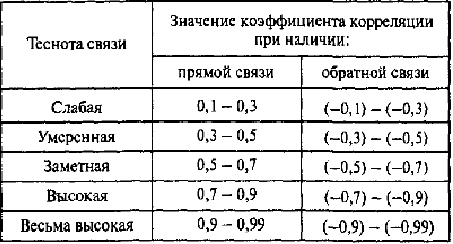

ОТБОР КРИТЕРИЕВ. ВАРИАНТ 1 (ручками)

In [61]:
df_corr['y']=df_corr['y'].abs()   # Отсортировали по убыванию (по модулю), чтобы выбрать критерии для Логистической регрессии.
df_corr=df_corr.sort_values(by='y',ascending=False) # ИСПОЛЬЗУЯ КРИТЕРИЙ 0,05, Выбираем: duration, pdays, previous
df_corr['y']                 # ТЕОРЕТИЧЕСКИ МОГУТ ИСПОЛЬЗОВАТЬСЯ. СПРОСИТЬ: retired, student, campaign, blue-collar, single, education, married


y                   1.000000
duration            0.394580
Id                  0.296072
pdays               0.103695
previous            0.093103
retired             0.079043
student             0.076555
campaign            0.073112
blue-collar         0.072011
single              0.063385
education           0.061161
married             0.060172
balance             0.052868
balance_standart    0.052868
balance_minmax      0.052868
management          0.033038
day                 0.028392
services            0.027816
age                 0.025176
default             0.022401
unemployed          0.020425
entrepreneur        0.019635
housemaid           0.015169
technician          0.009057
admin.              0.005702
divorced            0.002836
self-employed       0.000888
unknown             0.000281
Name: y, dtype: float64

ОТБОР КРИТЕРИЕВ. ВАРИАНТ 2 (автоматический)

In [107]:
df_select = pd.DataFrame((df.corr()["y"])) # Переводим выбранный столбец в ДатаФрейм
df_select

,y
Id,0.296072
age,0.025176
education,0.061161
default,-0.022401
balance,0.052868
day,-0.028392
duration,0.394580
campaign,-0.073112
pdays,0.103695
previous,0.093103


Присваиваем параметрам, соответствующим критерию (0,05 по модулю) категорию 1, оставльным 0

In [108]:
df_select["In_model"] = df_select.apply(lambda row: 1 if abs(row["y"]) > 0.05 else 0, axis = 1)
df_select

,y,In_model
Id,0.296072,1
age,0.025176,0
education,0.061161,1
default,-0.022401,0
balance,0.052868,1
day,-0.028392,0
duration,0.394580,1
campaign,-0.073112,1
pdays,0.103695,1
previous,0.093103,1


Оставляем нужные параметры (те, которые соответствуют 1)

In [110]:
df_select = df_select[df_select["In_model"] == 1]
df_select

,y,In_model
Id,0.296072,1
education,0.061161,1
balance,0.052868,1
duration,0.394580,1
campaign,-0.073112,1
pdays,0.103695,1
previous,0.093103,1
y,1.000000,1
balance_minmax,0.052868,1
balance_standart,0.052868,1


Определим функцию сигмоиды

In [112]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
i = np.linspace(-10, 10, 1000) # linspace создает numpy array длиной 100, через равные интервалы от -10 до 10.

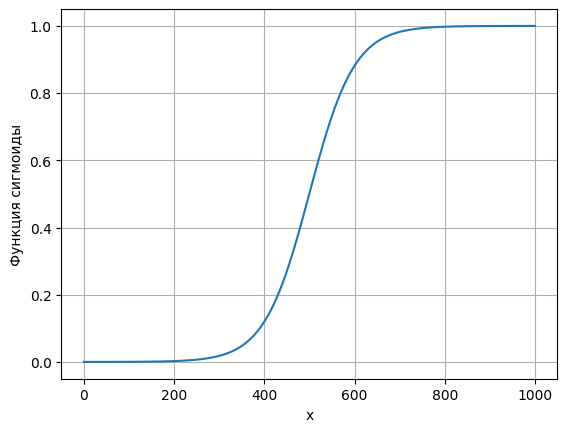

In [115]:
import matplotlib.pyplot as plt
plt.plot(sigmoid(i))
plt.xlabel('x')
plt.ylabel('Функция сигмоиды')
plt.grid()

Видим, что чем больше значение х, тем ближе к 1 вероятность того, что элемент относится к этому классу. Причем эта зависимость не линейная.:

Загружаем Библиотеку для построений Логистической Регрессии

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

ИНИЦИАЛИЗИРУЕМ СОЗДАННУЮ ЛОГИСТИЧЕСКУЮ РЕГРЕССИЮ

In [116]:
log_reg = LogisticRegression()

In [117]:
df_select.index

Index(['Id', 'education', 'balance', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'balance_minmax', 'balance_standart', 'blue-collar',
       'retired', 'student', 'married', 'single'],
      dtype='object')

Oпределим независимые и зависимые переменные (X и Y):

In [134]:
X = df[['education', 'balance', 'duration', 'campaign', 'pdays',
'previous', 'balance_minmax', 'balance_standart', 'blue-collar',
'retired', 'student', 'married', 'single']].sample(n=5000)        # отобрали случайные (sample) 5000 элементов
Y = df['y'].sample(n=5000)
X.shape    # Определим количество столбцов и строк в Х:

(5000, 13)

Делим выборку на обучающую и тестовую в пропорции 75/25.

In [135]:
test_split_index = int(X.shape[0]*0.75)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]


In [138]:
test_split_index

3750

In [139]:
X_train

,education,balance,duration,campaign,pdays,previous,balance_minmax,balance_standart,blue-collar,retired,student,married,single
19803,4,84.0,49,2,-1,0,0.073566,-0.419808,0,0,0,0,0
7595,4,737.0,135,2,-1,0,0.079494,-0.205347,1,0,0,1,0
17956,4,0.0,351,2,-1,0,0.072803,-0.447395,0,0,0,1,0
10176,0,0.0,249,1,-1,0,0.072803,-0.447395,1,0,0,1,0
29012,4,-367.0,98,1,207,1,0.069471,-0.567926,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,4,214.0,247,1,-1,0,0.074746,-0.377113,0,0,0,1,0
25996,8,3610.0,162,4,-1,0,0.105578,0.738212,0,0,0,1,0
24806,4,2203.0,151,1,-1,0,0.092804,0.276121,0,0,0,1,0
22098,1,0.0,238,2,-1,0,0.072803,-0.447395,0,0,0,1,0


In [140]:
X_test

,education,balance,duration,campaign,pdays,previous,balance_minmax,balance_standart,blue-collar,retired,student,married,single
8701,8,4737.0,226,1,-1,0,0.115810,1.108345,0,0,0,0,1
35506,4,-717.0,202,2,349,1,0.066294,-0.682874,1,0,0,0,1
14227,4,-810.0,77,2,-1,0,0.065449,-0.713418,0,0,0,1,0
3059,4,280.0,142,3,-1,0,0.075345,-0.355437,0,0,0,0,1
5776,8,682.0,473,5,-1,0,0.078995,-0.223411,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,4,863.0,355,1,-1,0,0.080638,-0.163966,0,0,0,1,0
27037,8,78.0,36,1,109,1,0.073512,-0.421778,0,0,0,1,0
7829,4,0.0,243,3,-1,0,0.072803,-0.447395,0,0,0,1,0
7987,4,-757.0,68,1,-1,0,0.065931,-0.696011,0,0,0,0,0


Обучим модель с использованием метода fit() (тренируем модель на обучающих данных):

In [136]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

ПРЕДСКАЗЫВАЕМ ЗНАЧЕНИЯ 'y' ИСПОЛЬЗУЯ ОБУЧЕННУЮ МОДЕЛЬ (log_reg)

В результате у нас получается массив с предсказанными значениями Y:

In [137]:
Y_predicted = log_reg.predict(X_test)
print(Y_predicted)

[0 0 0 ... 0 0 0]


СРАВНИВАЕМ ТЕСТОВЫЕ И ПРЕДСКАЗАННЫЕ ЗНАЧЕНИЯ

In [141]:
print('Accuracy:  %.2f' % accuracy_score(Y_test,Y_predicted))
print('Recall:    %.2f' % recall_score(Y_test,Y_predicted))
print('Precision: %.2f' % precision_score(Y_test,Y_predicted))

Accuracy:  0.88
Recall:    0.00
Precision: 0.00


Получили качество модели (Accuracy) 0,88, что является близким к отличному (0,9)